<a href="https://colab.research.google.com/github/mehalg/Predicting-PCOS-Using-Unsupervised-Learning-Algorithms/blob/main/PCOS_Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
#df= pd.read_csv("/content/PCOS_w_infertility.csv")
data= pd.read_csv("/content/PCOS_w_infertility.csv")


In [ ]:
data.head()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26


In [ ]:
data.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
AMH(ng/mL)                float64
dtype: object

In [ ]:
data

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.80,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,5,10005,0,801.45,801.45,2.26
...,...,...,...,...,...,...
536,537,10537,0,1.99,1.99,1.70
537,538,10538,0,80.13,1.99,5.60
538,539,10539,0,1.99,1.99,3.70
539,540,10540,0,292.92,1.99,5.20


In [ ]:
#df = df.convert_objects(convert_numeric=True)
#df['AMH(ng/mL)'] = df['AMH(ng/mL)'].str.replace('%','').astype(np.float64)


In [ ]:
#df = df.replace(r'^\s*$a', np.nan, regex=True)

In [ ]:
#df= df.convert_objects(convert_numeric=True)

In [ ]:
df= data.drop(['Sl. No','Patient File No.','PCOS (Y/N)'], axis=1)
df

,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
0,1.99,1.99,2.07
1,60.80,1.99,1.53
2,494.08,494.08,6.63
3,1.99,1.99,1.22
4,801.45,801.45,2.26
...,...,...,...
536,1.99,1.99,1.70
537,80.13,1.99,5.60
538,1.99,1.99,3.70
539,292.92,1.99,5.20


In [ ]:
df.shape

(541, 3)

In [ ]:
df.isnull().sum()

  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
AMH(ng/mL)                0
dtype: int64

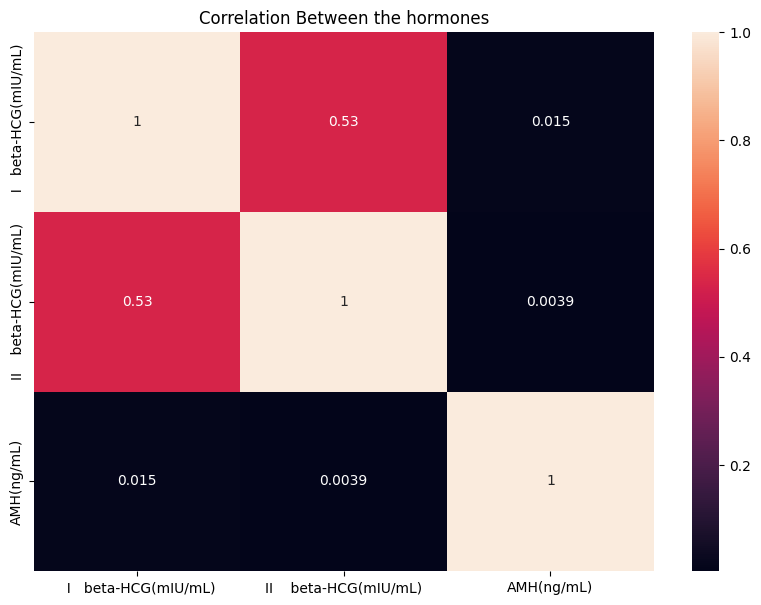

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Between the hormones")
plt.show()

In [ ]:
#df['PCOS (Y/N)'] = pd.to_numeric(df['PCOS (Y/N)'], errors='coerce')
#df = df.drop('', axis=1)

#**K-MEANS**

```
```



#Using Silhouette score to see optimal no of clusters



In [ ]:
#Using Silhouette score to see optimal no of clusters

for i in range(2,10):
  kmeans=KMeans(n_clusters=i, max_iter=100)
  kmeans.fit(df)
  score= silhouette_score(df, kmeans.labels_)
  print("for cluster: {}, the silhouette score is:{}".format(i,score))

for cluster: 2, the silhouette score is:0.9740156185336603
for cluster: 3, the silhouette score is:0.9760154598653847
for cluster: 4, the silhouette score is:0.9427031547257367
for cluster: 5, the silhouette score is:0.930981801336043
for cluster: 6, the silhouette score is:0.7315801626240815
for cluster: 7, the silhouette score is:0.731346783055726
for cluster: 8, the silhouette score is:0.7288118396327438
for cluster: 9, the silhouette score is:0.7298792897985383


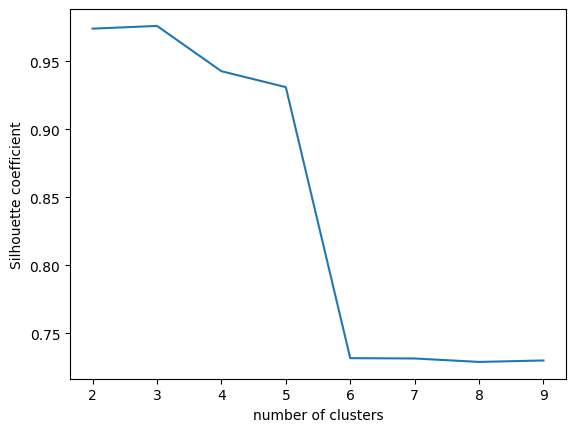

In [ ]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

#Using Elbow method to see optimal no of clusters

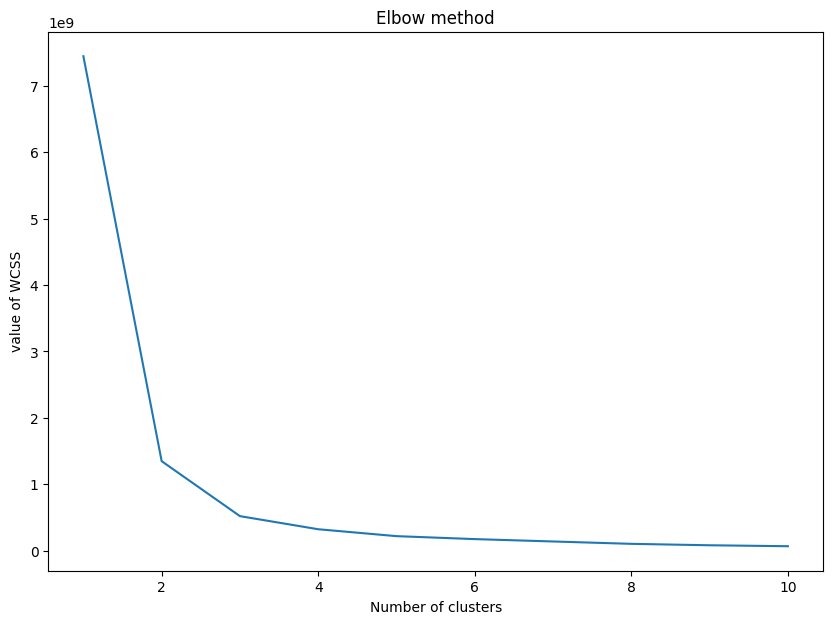

In [ ]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,7))
plt.plot(range(1,11),wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("value of WCSS")
plt.show()

In [ ]:
pip install yellowbrick


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


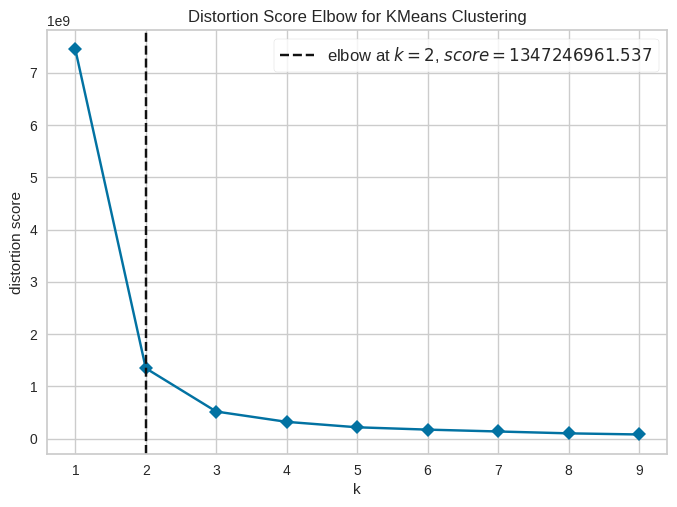

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), timings = False)
visualizer.fit(df)
visualizer.show()

In [ ]:
pca = PCA()
X = pca.fit_transform(df)

In [ ]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

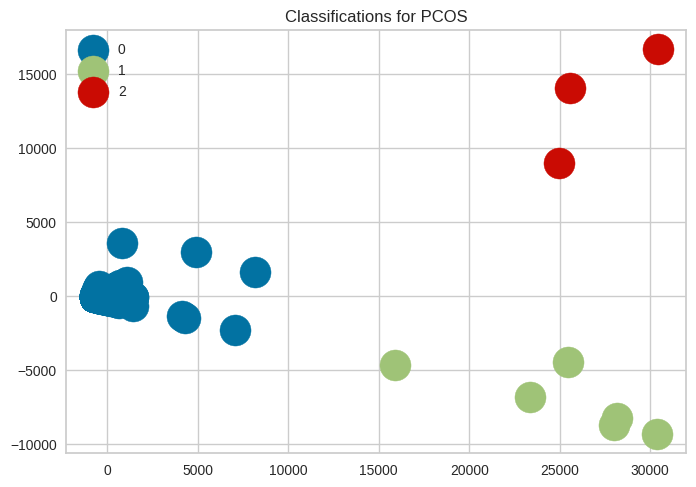

In [ ]:
for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i, s=500)

plt.legend()
plt.title('Classifications for PCOS')
plt.show()

#**HEIRARCHICAL CLUSTERING**

---



In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

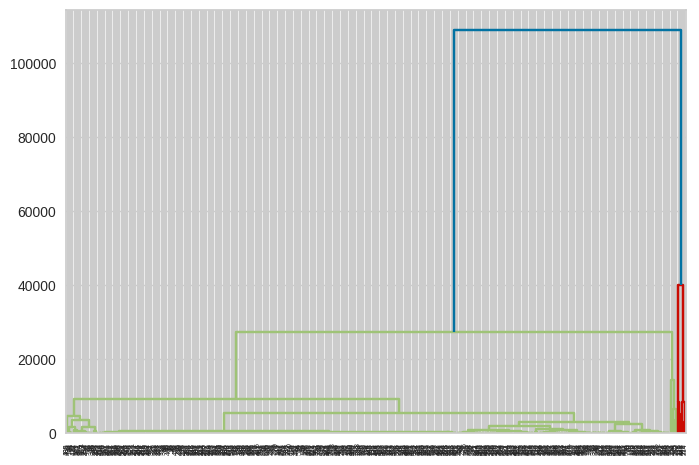

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

In [ ]:
#plt.scatter(df[0][:0], df[0][:,1])

In [ ]:
#x=df
#x

In [ ]:
#y= data['PCOS (Y/N)']
#y

In [ ]:
#from sklearn.model_selection import train_test_split

In [ ]:
#in, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
#from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#knn= KNeighborsClassifier(n_neighbors=1)

In [ ]:
#knn.fit(xtrain, ytrain)

In [ ]:
#ypred= knn.predict(xtest)
#ypred

In [ ]:
  #ytest

In [ ]:
!pip install minisom

from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=37d58f65b45c56231bb01206f0afc273babdc6f5e9d973e1f5dd404697803f3a
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
Successfully built minisom


In [ ]:
from minisom import MiniSom


In [ ]:
som = MiniSom(x=10, y=10, input_len=3, sigma=1.0, learning_rate=0.5)


In [ ]:
#som.random_weights_init(df)
#som.train_random(d=df, num_iteration=100)

#**DBSCAN**

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [ ]:
Clus_dataSet = df
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = np.array(Clus_dataSet, dtype=np.float64)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

In [ ]:
db = DBSCAN(eps=0.3, min_samples=5).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db']=labels

In [ ]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [ ]:
print(df.head())
print("number of labels: ", set(labels))

     I   beta-HCG(mIU/mL)  II    beta-HCG(mIU/mL)  AMH(ng/mL)  Clus_Db
0                    1.99                    1.99        2.07        0
1                   60.80                    1.99        1.53        0
2                  494.08                  494.08        6.63        0
3                    1.99                    1.99        1.22        0
4                  801.45                  801.45        2.26        0
number of labels:  {0, -1}


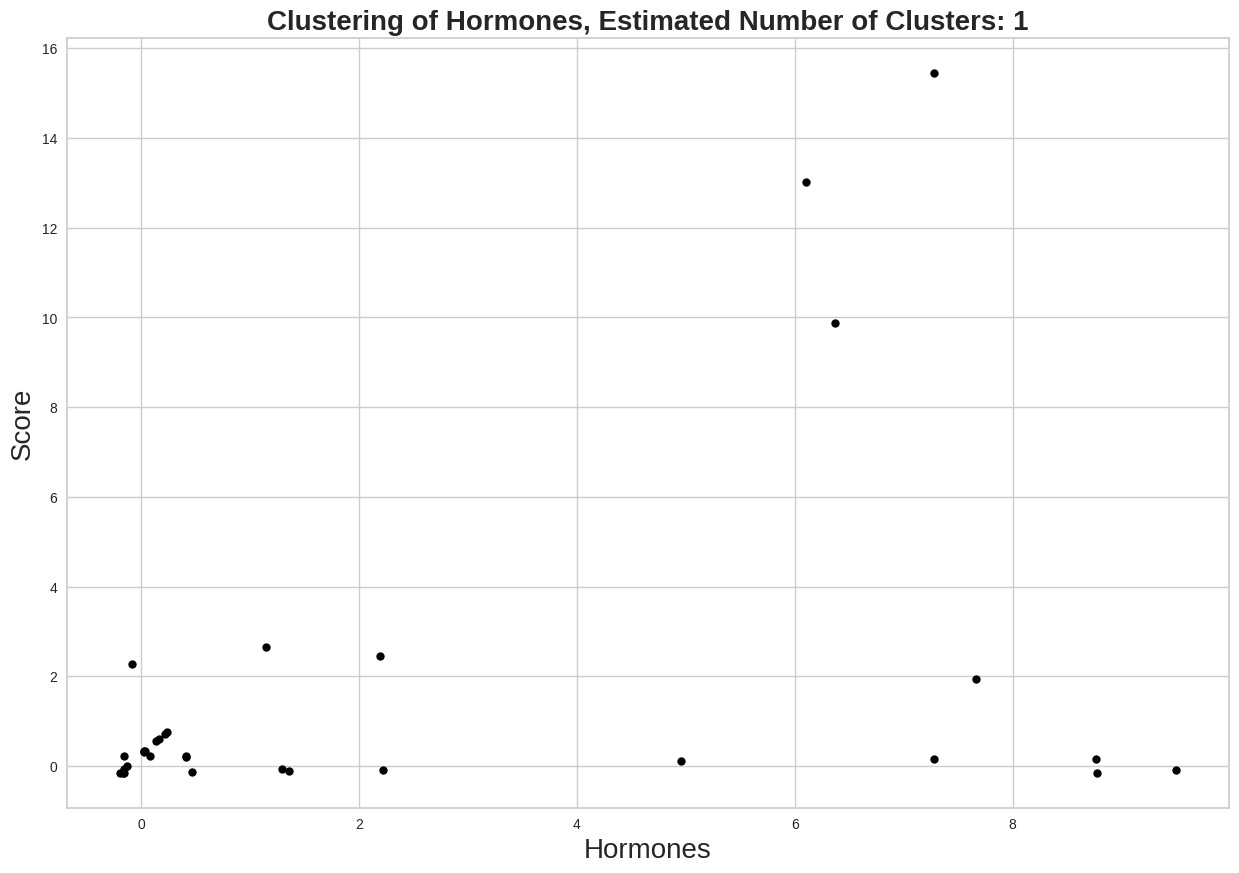

number of noise(s):  33


In [ ]:
plt.figure(figsize=(15,10))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:

        # Black used for noise.
        col = [0, 0, 0, 1]
class_member_mask = (labels == k)
xy = Clus_dataSet[class_member_mask & core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
xy = Clus_dataSet[class_member_mask & ~core_samples_mask]
plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Clustering of Hormones, Estimated Number of Clusters: %d' % realClusterNum, fontweight='bold',fontsize=20)
plt.xlabel('Hormones',fontsize=20)
plt.ylabel('Score',fontsize=20)
plt.legend(fontsize=20)
plt.show()
n_noise_ = list(labels).count(-1)
print('number of noise(s): ', n_noise_)